### Import SUM shit

In [1]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [2]:
# Standard data visualisaton params for Jupyter
%matplotlib inline
rcParams['figure.figsize'] = 15, 4
sb.set_style('whitegrid')

### Getting dataset

In [3]:
address = '../datasets/staandelamp_realistic.json'
df_data = pd.read_json(address)

# Sort the data on timestamp
df_data = df_data.sort_values(by=['time'])


# Grab around 6 hours of timestamps
### TEMP ###
df_data = df_data[:42]
### TEMP ###

df_data


,name,state,time
2,Staande_Lamp_3,0,1509489940655
6,Staande_Lamp_5,1,1509490011225
0,Staande_Lamp_1,1,1509491943009
1,Staande_Lamp_2,0,1509492221471
3,Staande_Lamp_3,1,1509492826941
4,Staande_Lamp_3,1,1509492860451
7,Staande_Lamp_1,1,1509492904889
5,Staande_Lamp_4,0,1509492910368
8,Staande_Lamp_2,0,1509492983553
12,Staande_Lamp_4,0,1509494311740


In [4]:
# Make dates readable for debugging purposes

In [5]:
import datetime
import time

df_printable_dates = df_data.copy(deep=True)
df_printable_dates['dates'] = df_data['time'].map(lambda x: time.ctime(x / 1000))
df_printable_dates['printable_dates'] = df_data['time'].map(lambda x: datetime.datetime.fromtimestamp(x / 1000).isoformat())

df_printable_dates

,name,state,time,dates,printable_dates
2,Staande_Lamp_3,0,1509489940655,Tue Oct 31 23:45:40 2017,2017-10-31T23:45:40.655000
6,Staande_Lamp_5,1,1509490011225,Tue Oct 31 23:46:51 2017,2017-10-31T23:46:51.225000
0,Staande_Lamp_1,1,1509491943009,Wed Nov 1 00:19:03 2017,2017-11-01T00:19:03.009000
1,Staande_Lamp_2,0,1509492221471,Wed Nov 1 00:23:41 2017,2017-11-01T00:23:41.471000
3,Staande_Lamp_3,1,1509492826941,Wed Nov 1 00:33:46 2017,2017-11-01T00:33:46.941000
4,Staande_Lamp_3,1,1509492860451,Wed Nov 1 00:34:20 2017,2017-11-01T00:34:20.451000
7,Staande_Lamp_1,1,1509492904889,Wed Nov 1 00:35:04 2017,2017-11-01T00:35:04.889000
5,Staande_Lamp_4,0,1509492910368,Wed Nov 1 00:35:10 2017,2017-11-01T00:35:10.368000
8,Staande_Lamp_2,0,1509492983553,Wed Nov 1 00:36:23 2017,2017-11-01T00:36:23.553000
12,Staande_Lamp_4,0,1509494311740,Wed Nov 1 00:58:31 2017,2017-11-01T00:58:31.740000


### reformat the first column to iterables to prevent the following error when building the DBSCAN model:
ValueError: could not convert string to float: 'Staande_Lamp_5'

In [6]:
# THIS WORKS TOO: (but you end up with a numpy array instead of the pandas dataframe)

# from sklearn.preprocessing import LabelEncoder
# encode = LabelEncoder()
# arr = df.values
# 
# column = 0;
# arr[:,column] = encode.fit_transform(arr[:,column])

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

print('before:\n', df_data.head())

d = defaultdict(LabelEncoder)
df_fit = df_data.apply(lambda x: d[x.name].fit_transform(x))
df_fit['time'] = df_data['time']
print('after:\n', df_fit.head())

before:
              name  state           time
2  Staande_Lamp_3      0  1509489940655
6  Staande_Lamp_5      1  1509490011225
0  Staande_Lamp_1      1  1509491943009
1  Staande_Lamp_2      0  1509492221471
3  Staande_Lamp_3      1  1509492826941
after:
    name  state           time
2     2      0  1509489940655
6     4      1  1509490011225
0     0      1  1509491943009
1     1      0  1509492221471
3     2      1  1509492826941


### Clustering
##### 300000ms = 5 minutes

In [7]:
model = DBSCAN(eps=300000, min_samples=2).fit(df_fit)
print(model)

DBSCAN(algorithm='auto', eps=300000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)


# Visualize results

In [8]:
df_outliers = pd.DataFrame(df_fit)
print(Counter(model.labels_))
print('amount of data:', df_fit.shape[0])
print('amount of outliers:', df_outliers[model.labels_==-1].shape[0])
print('\nsome of the outliers:\n', df_outliers[model.labels_==-1].head())

Counter({-1: 12, 2: 5, 6: 4, 10: 4, 7: 3, 0: 2, 1: 2, 3: 2, 4: 2, 5: 2, 8: 2, 9: 2})
amount of data: 42
amount of outliers: 12

some of the outliers:
     name  state           time
12     3      0  1509494311740
13     4      1  1509495178373
11     2      0  1509496790877
19     3      0  1509498728417
18     2      0  1509499036484


##### Create a color dictionary for the scatter-plot

In [9]:
COLOR_MAP = {}
for n in set(model.labels_):
    if n % 3 == 0:
        COLOR_MAP[n] = 'firebrick'
    elif n % 3 == 1:
        COLOR_MAP[n] = 'darkgreen'
    else:
        COLOR_MAP[n] = 'darkblue'

#Outliers
COLOR_MAP[-1] = 'lightgrey'

print('All of the datapoints:\n', model.labels_)
print('\n')
print('One color for each datapoint:\n', set(model.labels_))

All of the datapoints:
 [ 0  0  1  1  2  2  2  2  2 -1 -1  3  3 -1  4  4  5  5 -1 -1 -1 -1  6  6
  6  6 -1  7  7  7  8  8  9  9 -1 -1 10 10 10 10 -1 -1]


One color for each datapoint:
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}


##### Create the graph

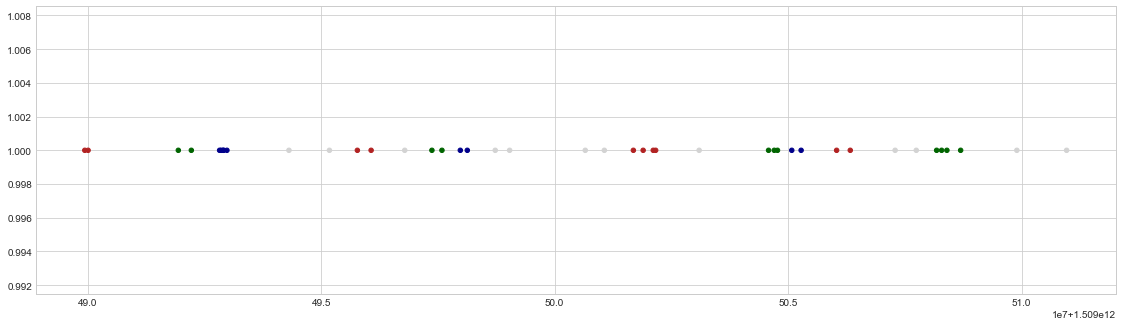

In [10]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = [COLOR_MAP[l] for l in model.labels_]

# colors = model.labels_

# use first column as X value
X = df_fit.iloc[:,2]
# set nr 1 as the value for y so it will be 1Dimentional
Y = [1] * df_fit.shape[0]

ax.scatter(X, Y, c=colors, s=20)
ax.set_xlabel = 'time'
plt.title = 'Groupingz'

![title](../datasets/images/expected_6_hours_realistic_legend.png)
![title](../datasets/images/expected_6_hours_realistic.png)